In [20]:
from sklearn.datasets import dump_svmlight_file
import numpy as np
import pandas as pd
import os
import urllib
import zipfile
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt


In [7]:
import os
os.chdir('/content/drive/My Drive/wstm/code')
!pwd

/content/drive/My Drive/wstm/code


In [8]:
dataset = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
dt_name = os.path.basename(dataset)
print('Downloading {}'.format(dt_name))
with urllib.request.urlopen(dataset) as response, open('../data/'+dt_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
print('Download completed')

Download completed


In [9]:
with zipfile.ZipFile('../data/'+dt_name, 'r') as zip_ref:
    zip_ref.extractall('../data/')
dt_dir_name = os.path.splitext(dt_name)[0]

In [34]:
rdata= pd.read_csv('../data/'+dt_dir_name +'/'+ 'u.data', delimiter='\t', names=['userId', 'movieId', 'rating', 'timestamp'])
usrdata= pd.read_csv('../data/'+dt_dir_name +'/'+ 'u.user', delimiter='|', names=['userId', 'age' ,'gender' ,'occupation' , 'zip code'])
usrdata['userId'] = 'user' + usrdata['userId'].astype(str)
rdata['userId'] = 'user' + rdata['userId'].astype(str)
rdata['movieId'] = 'movie' + rdata['movieId'].astype(str)


In [36]:
rdata.head()

,userId,movieId,rating,timestamp
0,user196,movie242,3,881250949
1,user186,movie302,3,891717742
2,user22,movie377,1,878887116
3,user244,movie51,2,880606923
4,user166,movie346,1,886397596


In [37]:
usrdata.head()

,userId,age,gender,occupation,zip code
0,user1,24,M,technician,85711
1,user2,53,F,other,94043
2,user3,23,M,writer,32067
3,user4,24,M,technician,43537
4,user5,33,F,other,15213


In [39]:
all_data = rdata.join(usrdata.set_index('userId'), on='userId')
all_data.head()

,userId,movieId,rating,timestamp,age,gender,occupation,zip code
0,user196,movie242,3,881250949,49,M,writer,55105
1,user186,movie302,3,891717742,39,F,executive,00000
2,user22,movie377,1,878887116,25,M,writer,40206
3,user244,movie51,2,880606923,28,M,technician,80525
4,user166,movie346,1,886397596,47,M,educator,55113


In [42]:
usr_attrs = usrdata.set_index('userId').to_dict('index')

In [51]:
import networkx as nx
from networkx import *
 
#Create a graph
G = nx.DiGraph()
 
#Add nodes
G.add_nodes_from(usr_rating_data.userId, bipartite=0)
G.add_nodes_from(usr_rating_data.movieId, bipartite=1)
nx.set_node_attributes(G, usr_attrs)

#Add weights for edges
G.add_weighted_edges_from([(uId, mId,rating) for (uId, mId, rating) in usr_rating_data[['userId', 'movieId', 'rating']].to_numpy()])

In [52]:
print(info(G))

Name: 
Type: DiGraph
Number of nodes: 2625
Number of edges: 100000
Average in degree:  38.0952
Average out degree:  38.0952


In [53]:
G.is_directed(), G.is_multigraph(), is_bipartite(G)

(True, False, True)

In [55]:
nx.write_gpickle(G, "../data/ml_graph.gpickle")
all_data.to_pickle("../data/ml_df.pkl")

In [59]:
G['user196']['movie242']

{'weight': 3}

In [18]:
# print("radius: %d" % radius(G))
# print("diameter: %d" % diameter(G))
# print("eccentricity: %s" % eccentricity(G))
# print("center: %s" % center(G))
# print("periphery: %s" % periphery(G))
# print("density: %s" % density(G))

In [19]:
color_map = []
for node in G.nodes:
    if str(node).startswith('u'):
        color_map.append('yellow')
    else:
        color_map.append('green')
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 
nx.draw(G,pos,node_color=color_map)
plt.show()

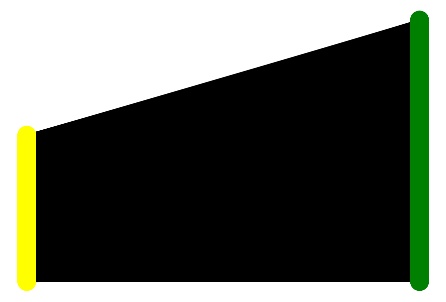

In [22]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, node_color=color_map)
plt.show()